In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('/content/drive/MyDrive/IT Sector /csv files/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
y=df['insuranceclaim']
X=df.drop('insuranceclaim',axis=1)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
# Standard Scaler

In [7]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [8]:
# Neural Network
# sigmoid activation functn used in 3 rd layer as it is a binary classification problem

In [9]:
model=tf.keras.Sequential([tf.keras.layers.Dense(2,activation='relu',input_shape=(X.shape[1],)),
                           tf.keras.layers.Dense(3,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])

In [10]:
model.summary()
# 14inputs*2weights+2bias=16

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 16        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [12]:
trained_model=model.fit(X_train_ss,y_train,epochs=50,batch_size=10)

Epoch 1/50
94/94 [==============================] - 1s 1ms/step - loss: 0.6632
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6427
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6226
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6021
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5818
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5609
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5385
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5155
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4925
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4694
Epoch 11/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4483
Epoch 12/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4306
Epoch 13/50
94/94 [==============================

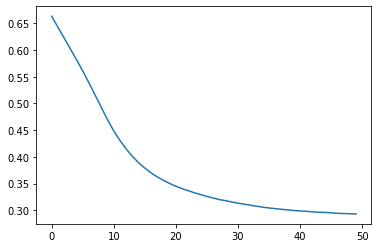

In [13]:
plt.plot(trained_model.history['loss'])

In [14]:
# Testing

In [15]:
y_pred=model.predict(X_test_ss)

In [ ]:
y_pred 
# since in depp learning model y value is provided in probability form and not in 0 & 1, which is diff from ML model

In [21]:
y_pred=np.where(y_pred>=0.5,1,0)
# if y_pred > 0.5 it will convert it to 1 else to 0

In [ ]:
y_pred

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.92      0.88      0.90       245

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.88      0.88       402

